# DBSCAN Regression

Configure the project. Indeed you create a dataset in csv format.

In [1]:
! rm -rf *.csv
! unzip ./dataset/archive.zip
! mv dataset.csv data.csv


Archive:  ./dataset/archive.zip
  inflating: dataset.csv             


Import needed libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

%matplotlib inline

# Make Sample to practice on DBSCAN

In [3]:
datasets = [StandardScaler().fit_transform(data[0]) for data in [
    make_moons(n_samples=1500, noise=0.05),
    make_circles(n_samples=1500, factor=0.5, noise=0.05),
    make_blobs(n_samples=1500, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
]]

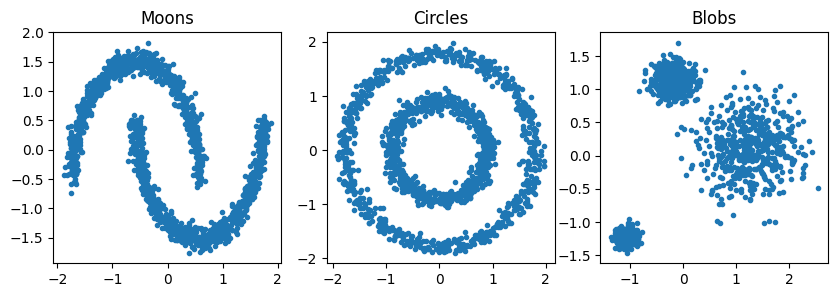

In [4]:
titles = ['Moons', 'Circles', 'Blobs']
plt.figure(figsize=(10, 3))

for i, (X, title) in enumerate(zip(datasets, titles), 1):
    plt.subplot(1, 3, i)
    plt.scatter(X[:, 0], X[:, 1], marker='.')
    plt.title(title)

plt.show()

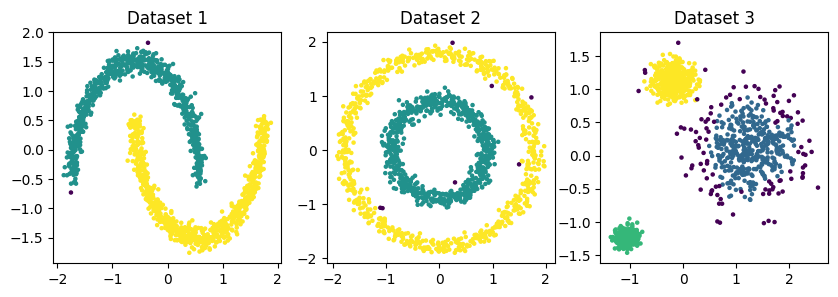

In [5]:
eps = 0.15
min_samples = 10

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for i, dataset in enumerate(datasets):
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(dataset)
    
    axes[i].scatter(dataset[:, 0], dataset[:, 1], c=model.labels_, s=5)
    axes[i].set_title(f"Dataset {i+1}")

plt.show()

<font color="red" size=6>
The dark purple points are noisy points that are not in any cluster
</font>

# Real Data

Read data from data.csv using pandas and store in data frame structure. Also shuffle data to have uniform distribution. 

In [6]:
df = pd.read_csv("data.csv")
df.head()
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,F,KW,KuwaIT,MiddleSchool,G-07,A,English,F,Father,19,30,26,19,Yes,Bad,Above-7,M
1,F,Lybia,Lybia,MiddleSchool,G-07,B,Biology,F,Mum,10,9,2,1,No,Good,Above-7,L
2,M,Jordan,Palestine,MiddleSchool,G-07,A,Biology,F,Mum,78,91,50,40,Yes,Good,Under-7,H
3,M,Palestine,Jordan,MiddleSchool,G-06,A,English,S,Mum,92,31,42,27,Yes,Good,Under-7,H
4,M,Palestine,Palestine,MiddleSchool,G-07,A,Biology,S,Father,89,92,89,83,Yes,Good,Under-7,H


In [7]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,4,4,1,4,0,3,0,0,19,30,26,19,1,0,0,2
1,0,5,5,1,4,1,1,0,1,10,9,2,1,0,1,0,1
2,1,3,7,1,4,0,1,0,1,78,91,50,40,1,1,1,0
3,1,7,3,1,3,0,3,1,1,92,31,42,27,1,1,1,0
4,1,7,7,1,4,0,1,1,0,89,92,89,83,1,1,1,0


In [8]:
# summarize data
df.describe() 

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.635417,4.345833,4.397917,1.345833,2.906250,0.472917,5.256250,0.489583,0.410417,46.775000,54.797917,37.918750,43.283333,0.562500,0.608333,0.602083,1.143750
std,0.481815,2.469265,2.628334,0.603732,2.464267,0.612411,3.388388,0.500413,0.492423,30.779223,33.080007,26.611244,27.637735,0.496596,0.488632,0.489979,0.846312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,15.750000,20.000000,14.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,4.000000,1.000000,4.000000,0.000000,5.000000,0.000000,0.000000,50.000000,65.000000,33.000000,39.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,4.000000,2.000000,5.000000,1.000000,7.000000,1.000000,1.000000,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,13.000000,13.000000,2.000000,9.000000,2.000000,11.000000,1.000000,1.000000,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000,1.000000,2.000000


Print the histogram chart of data

In [9]:
print(df.columns)

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


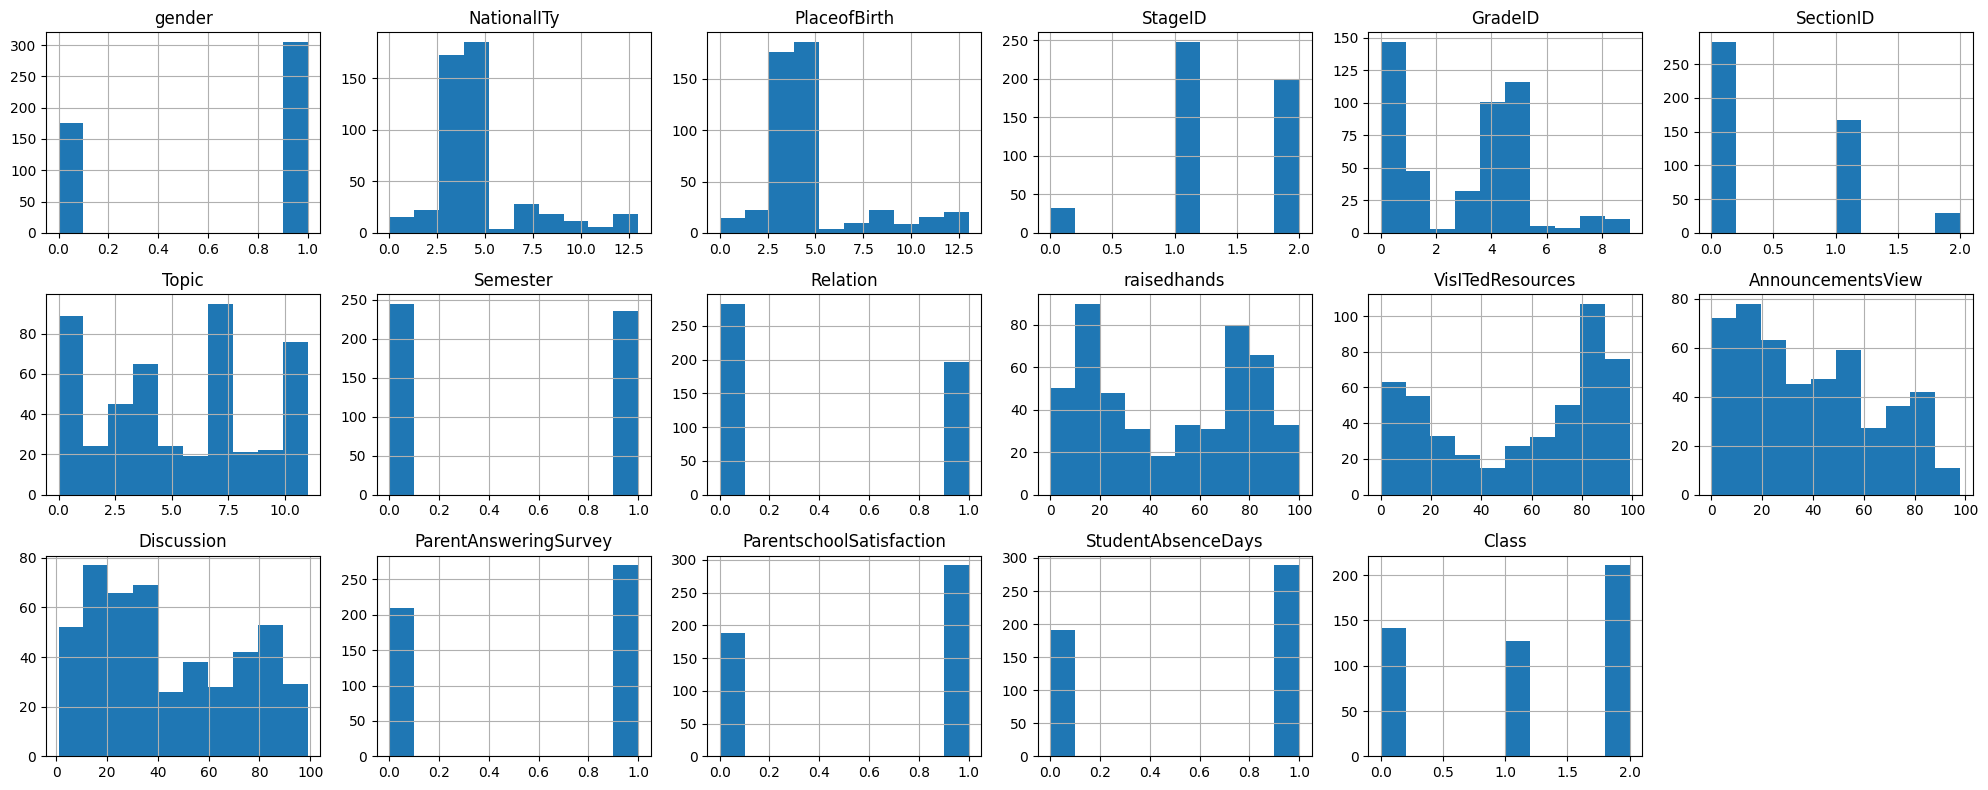

In [10]:
viz = df[['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']]
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 8))

axes = axes.flatten()

for i, column in enumerate(viz.columns):
    viz[column].hist(ax=axes[i])
    axes[i].set_title(column)

fig.delaxes(axes[17])
plt.tight_layout()
plt.show()

Print scatter chart of data to recognize the patterns of data. I draw them based on VisITedResources parameter.

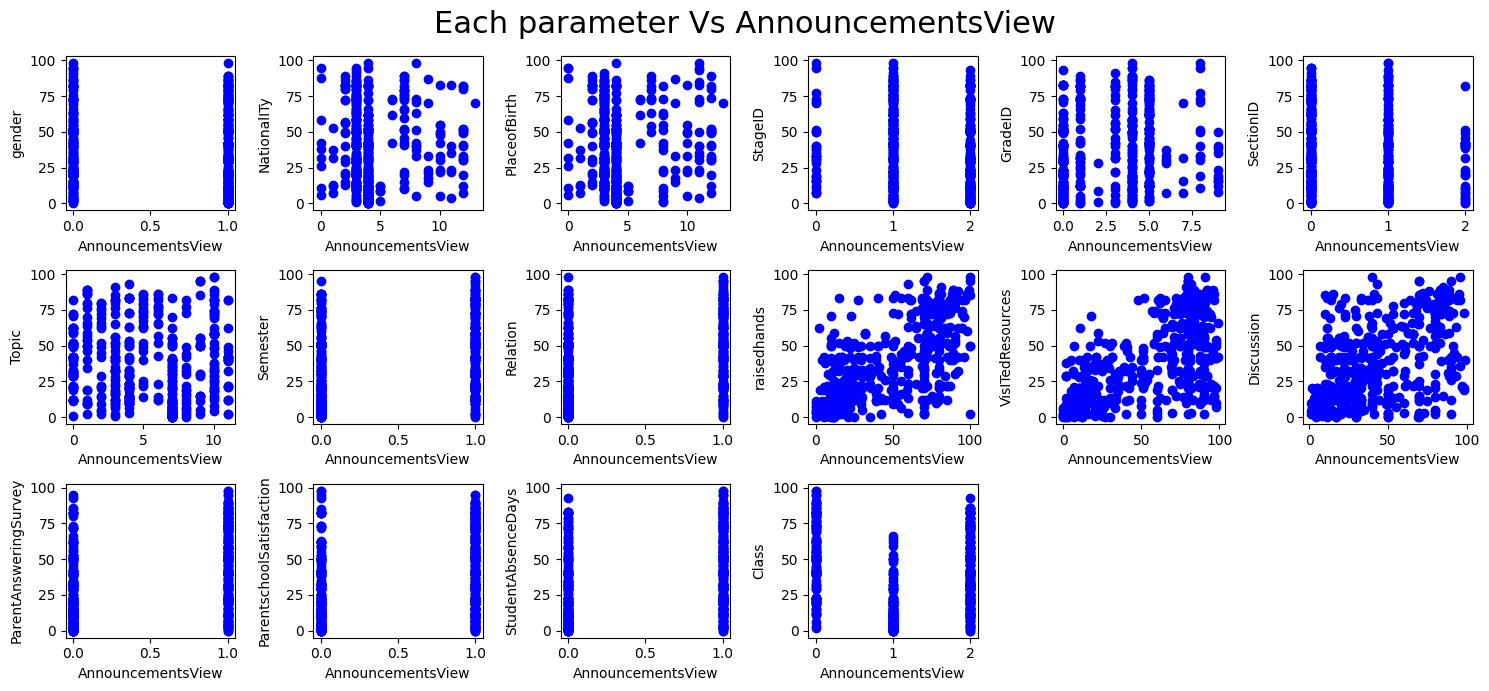

In [11]:
fig, axs = plt.subplots(3, 6, figsize=(15, 7))
fig.delaxes(axs[2, 4])
fig.delaxes(axs[2, 5])  # To remove extra empty plots since 3x6 = 18 but we only need 16 plots

columns = df.columns.drop('AnnouncementsView')
row, col = 0, 0

for column in columns:
    if col == 6:
        col = 0
        row += 1
    axs[row, col].scatter(df[column], df['AnnouncementsView'], color="blue")
    axs[row, col].set_ylabel(column)
    axs[row, col].set_xlabel('AnnouncementsView')
    col += 1

fig.suptitle("Each parameter Vs AnnouncementsView", fontsize=22)

plt.tight_layout()
plt.show()

Make the dataset minimal to work with it more easily

In [12]:
X = df.values
normal_x = StandardScaler().fit_transform(X)

In [13]:
model = DBSCAN(eps=2.5, min_samples=5)
model.fit(normal_x)

DBSCAN(eps=2.5)

In [14]:
df["cluster"] = model.labels_
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,cluster
0,0,4,4,1,4,0,3,0,0,19,30,26,19,1,0,0,2,-1
1,0,5,5,1,4,1,1,0,1,10,9,2,1,0,1,0,1,-1
2,1,3,7,1,4,0,1,0,1,78,91,50,40,1,1,1,0,1
3,1,7,3,1,3,0,3,1,1,92,31,42,27,1,1,1,0,1
4,1,7,7,1,4,0,1,1,0,89,92,89,83,1,1,1,0,-1


In [15]:
df['cluster'].value_counts()

cluster
-1    279
 0    105
 1     65
 5     10
 6      7
 3      5
 4      5
 2      4
Name: count, dtype: int64

/tmp/ipykernel_212736/1055311568.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_clusters))


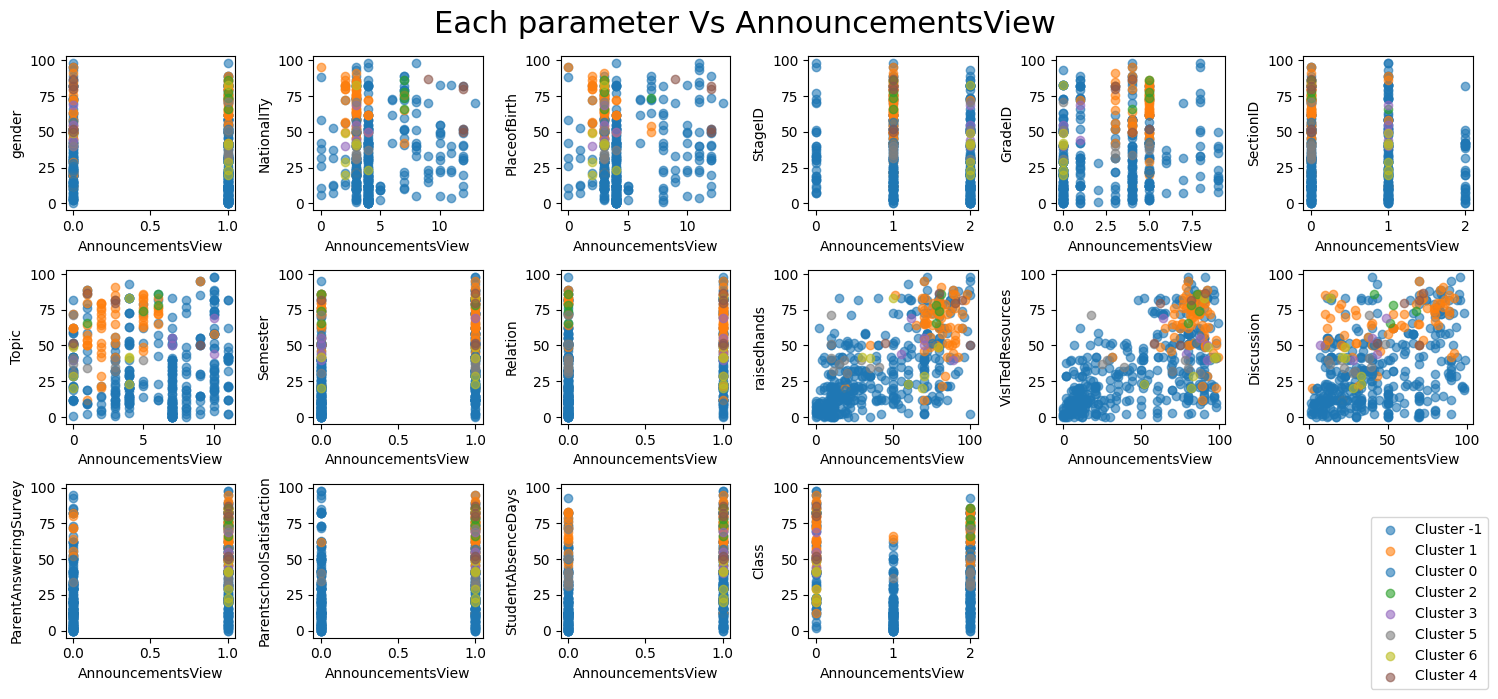

In [16]:
fig, axs = plt.subplots(3, 6, figsize=(15, 7))
columns = df.columns.drop(['AnnouncementsView', 'cluster'])
row, col = 0, 0

unique_clusters = df["cluster"].unique()
colors = plt.cm.get_cmap("tab10", len(unique_clusters))

for column in columns:
    if col == 6:
        col = 0
        row += 1
    for cluster in unique_clusters:
        mask = df["cluster"] == cluster
        axs[row, col].scatter(df[mask][column], df[mask]['AnnouncementsView'], 
                              color=colors(cluster), label=f'Cluster {cluster}' if row == 0 and col == 0 else "", 
                              alpha=0.6)
    axs[row, col].set_ylabel(column)
    axs[row, col].set_xlabel('AnnouncementsView')
    col += 1

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, 0), bbox_transform=fig.transFigure, ncol=1)
fig.suptitle("Each parameter Vs AnnouncementsView", fontsize=22)

fig.delaxes(axs[2, 4])
fig.delaxes(axs[2, 5])
plt.tight_layout()
plt.show()

> NOTE:
>
>  Note that our feature set is not 2D, so plotting the points in 2D is not appropriate, and some points overlap each other. Indeed, the points are clustered based on all features, not one by one, with AnnouncementsView.

## Lets print the clusters without noise points

/tmp/ipykernel_212736/3029513129.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_clusters))


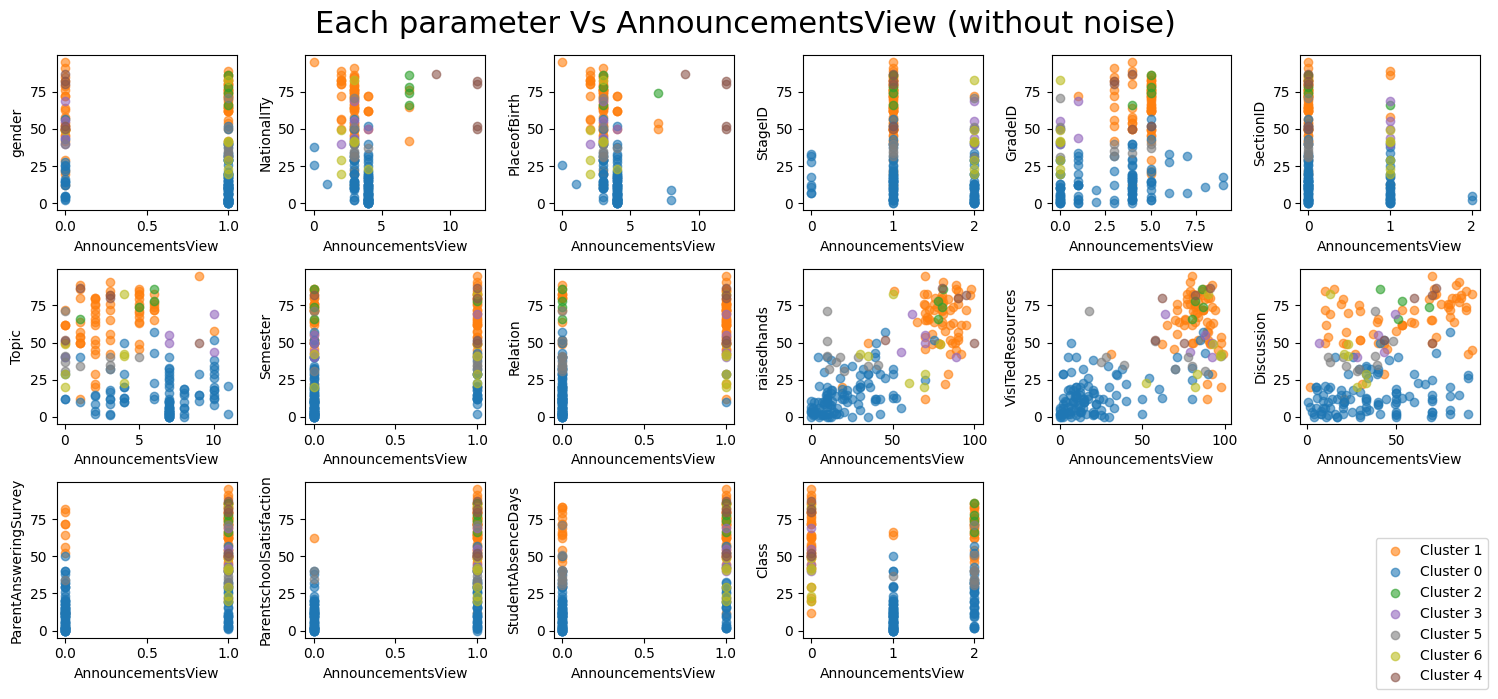

In [17]:
fig, axs = plt.subplots(3, 6, figsize=(15, 7))
columns = df.columns.drop(['AnnouncementsView', 'cluster'])
row, col = 0, 0

unique_clusters = df["cluster"].unique()
colors = plt.cm.get_cmap("tab10", len(unique_clusters))

for column in columns:
    if col == 6:
        col = 0
        row += 1
    for cluster in unique_clusters:
        if cluster == -1:
            continue  # Skip noise points
        mask = df["cluster"] == cluster
        axs[row, col].scatter(df[mask][column], df[mask]['AnnouncementsView'], 
                              color=colors(cluster), label=f'Cluster {cluster}' if row == 0 and col == 0 else "", 
                              alpha=0.6)
    axs[row, col].set_ylabel(column)
    axs[row, col].set_xlabel('AnnouncementsView')
    col += 1

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, 0), bbox_transform=fig.transFigure, ncol=1)
fig.suptitle("Each parameter Vs AnnouncementsView (without noise)", fontsize=22)

fig.delaxes(axs[2, 4])
fig.delaxes(axs[2, 5])
plt.tight_layout()
plt.show()